In [1]:
from Regression import Regression
from Franke import Franke, FrankeNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams["figure.figsize"] = [6.0, 6.0]
mpl.rcParams["font.size"] = 16

np.random.seed(1942)

# Generate data

In [2]:
x,y = np.linspace(0,1,201),np.linspace(0,1,201)
reg = Regression()
reg.generate_generic_data(x,y,FrankeNoise)
reg

In [3]:
lamda = 1e-6
max_iter = 1e4
tol = 1e-4
poly_order = 5
t0 = time.time()
print('-----------------------')
print('Solving coefficients...')
beta = reg.solveCoefficients(poly_order=poly_order,solver='Lasso',lamda=lamda,max_iter=max_iter,tol=tol)
print('Time: ',time.time()-t0)

-----------------------
Solving coefficients...
Cond of XT*X:  26059769.440452732
Time:  0.5697638988494873


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20165.232618067745, tolerance: 4.381903639941162
  positive)


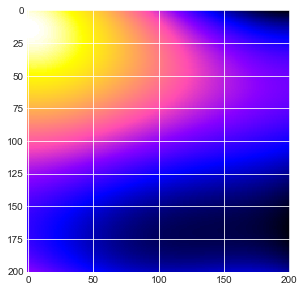

In [4]:
data_pred = reg.apply_model(beta,reg.x_mesh,reg.y_mesh)
plt.imshow(data_pred);

# Trying K-Folding

In [5]:
data_pred_Kfold = reg.solveKFold(K=10,poly_order=poly_order,solver='Lasso')

Cond of XT*X:  26161284.512578033


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304.4740428188306, tolerance: 3.9386967611080097
  positive)


Cond of XT*X:  25913103.725377895


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1541.068903178355, tolerance: 3.9562862705224586
  positive)


Cond of XT*X:  26288360.756150562


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1517.9136204303431, tolerance: 3.965029644374006
  positive)


Cond of XT*X:  26237765.911904104


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1748.0727818722698, tolerance: 3.9481602576807115
  positive)


Cond of XT*X:  26085571.11955945


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1523.33396605089, tolerance: 3.9383434237589463
  positive)


Cond of XT*X:  25893718.46750295


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1687.5747735161895, tolerance: 3.9335477639193184
  positive)


Cond of XT*X:  26106368.703897398


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1135.4051530492761, tolerance: 3.9260082558612823
  positive)


Cond of XT*X:  26135838.70806247


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.9788247833458, tolerance: 3.9317595716308977
  positive)


Cond of XT*X:  25744794.911281653


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1650.945298446466, tolerance: 3.945400494369237
  positive)


Cond of XT*X:  26128326.148566272


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1893.3021502647534, tolerance: 3.9537741877726202
  positive)


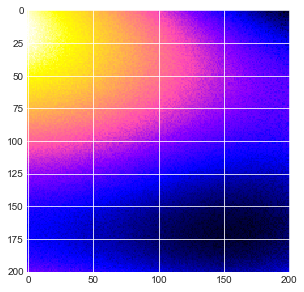

In [6]:
plt.imshow(data_pred_Kfold)